In [1]:
import pandas as pd
base = pd.read_csv('../dataset/dataset_train.csv')
base = base.dropna()

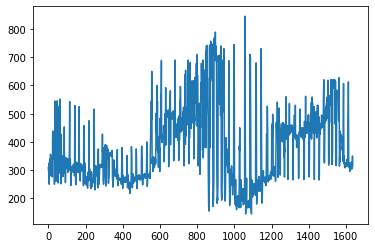

In [2]:
base = base.iloc[:, 1].values
import matplotlib.pyplot as plt
plt.plot(base)

In [3]:
periodos = 30
previsao_futura = 1 # horizonte

X = base[0:(len(base) - (len(base) % periodos))]
X_batches = X.reshape(-1, periodos, 1)

y = base[1:(len(base) - (len(base) % periodos)) + previsao_futura]
y_batches = y.reshape(-1, periodos, 1)

X_teste = base[-(periodos + previsao_futura):]
X_teste = X_teste[:periodos]
X_teste = X_teste.reshape(-1, periodos, 1)
y_teste = base[-(periodos):]
y_teste = y_teste.reshape(-1, periodos, 1)

In [4]:
X_batches.shape, y_batches.shape, X_teste.shape, y_teste.shape

((54, 30, 1), (54, 30, 1), (1, 30, 1), (1, 30, 1))

In [5]:
import tensorflow as tf
tf.random.set_seed(42)

tf.__version__

'2.4.0'

In [6]:
entradas = 1
neuronios_oculta = 100
neuronios_saida = 1

# Usando RNN Simples

In [7]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.rnn = tf.keras.layers.SimpleRNN(units = neuronios_oculta, activation = 'relu', return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.rnn(inputs)
        x = self.dense(x)

        return x

In [8]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  95786.68850591272
101  erro:  7121.268640755876
201  erro:  5427.644311281046
301  erro:  4769.33321135283
401  erro:  4464.744960336927
501  erro:  4265.956895774465
601  erro:  4062.4382000619566
701  erro:  3826.7721237757555
801  erro:  3653.679543395362
901  erro:  3536.346611669457


In [9]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[324.34222],
        [312.0151 ],
        [331.10403],
        [334.02353],
        [304.9767 ],
        [445.21524],
        [514.8937 ],
        [525.9181 ],
        [456.46597],
        [313.76654],
        [289.23108],
        [312.90726],
        [349.21478],
        [334.54248],
        [295.17813],
        [306.87762],
        [313.2232 ],
        [310.9656 ],
        [330.1302 ],
        [321.03915],
        [325.3845 ],
        [327.16357],
        [317.0845 ],
        [343.93335],
        [317.1873 ],
        [315.47336],
        [347.13898],
        [324.92432],
        [317.352  ],
        [357.199  ]]], dtype=float32)>

In [10]:
import numpy as np
y_teste2 = np.ravel(y_teste)

In [11]:
previsoes2 = np.ravel(previsoes.numpy())

In [12]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste2, previsoes2)
mae

31.15733312988281

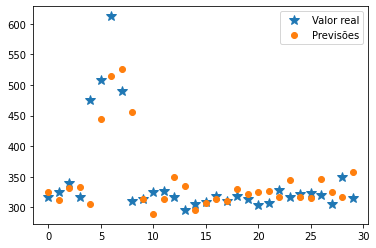

In [13]:
plt.plot(y_teste2, '*', markersize = 10, label = 'Valor real')
plt.plot(previsoes2, 'o', label = 'Previsões')
plt.legend()

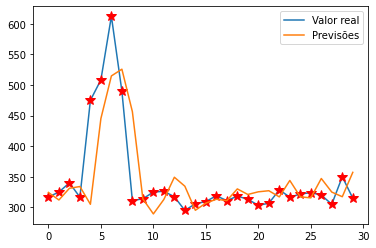

In [14]:
plt.plot(y_teste2, label = 'Valor real')
plt.plot(y_teste2, 'w*', markersize = 10, color = 'red')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()

# Usando LSTM

In [15]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.lstm = tf.keras.layers.LSTM(units = neuronios_oculta, activation = 'relu', return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.lstm(inputs)
        x = self.dense(x)

        return x

In [17]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  134481.5168376294
101  erro:  33263.47653326132
201  erro:  22934.347095086836
301  erro:  18330.84141426212
401  erro:  15765.6570954014
501  erro:  13963.65296782234
601  erro:  12279.722872306287
701  erro:  11149.952911012238
801  erro:  10316.763988796189
901  erro:  2185521.5208969


In [18]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[ 118.44422 ],
        [ 201.64972 ],
        [ 246.80534 ],
        [ 307.9196  ],
        [ 253.70854 ],
        [ 317.7877  ],
        [ 368.92917 ],
        [ 437.91534 ],
        [ 628.94073 ],
        [ 696.7604  ],
        [ 774.8124  ],
        [ 515.1582  ],
        [ 698.3801  ],
        [ 431.1839  ],
        [ 330.19403 ],
        [ 177.56776 ],
        [ 126.33466 ],
        [  32.084484],
        [ -86.36486 ],
        [ 680.7166  ],
        [ 381.52405 ],
        [ 227.52528 ],
        [ 224.18446 ],
        [ 289.97424 ],
        [ 330.43713 ],
        [ 355.15125 ],
        [ 361.4818  ],
        [ 346.48718 ],
        [ 323.53552 ],
        [-229.34386 ]]], dtype=float32)>

In [19]:
y_teste2 = np.ravel(y_teste)
previsoes2 = np.ravel(previsoes.numpy())
mae = mean_absolute_error(y_teste2, previsoes2)
mae

179.0010153757731

# Múltiplas camadas LSTM

O construtor para empilhar células com estrutura de RNN deve ser `tf.keras.layers.StackedRNNCells`, que depois deve ser consolidada em uma camada usando o construtor `tf.keras.layers.RNN`, conforme exemplo em https://www.tensorflow.org/api_docs/python/tf/keras/layers/StackedRNNCells#examples

In [20]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        lstms = [tf.keras.layers.LSTMCell(units = neuronios_oculta, activation = 'relu') for _ in range(4)]
        stacked_lstm = tf.keras.layers.StackedRNNCells(cells = lstms)
        self.lstm_layer = tf.keras.layers.RNN(cell = stacked_lstm, return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.lstm_layer(inputs)
        x = self.dense(x)

        return x

In [22]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  152055.5560928092
101  erro:  295129.52800579194
201  erro:  256868.34905078946
301  erro:  101892.224156464
401  erro:  85232.06137499803
501  erro:  56765.44986439875
601  erro:  48851.837506940254
701  erro:  45361.35035529295
801  erro:  42276.08177673545
901  erro:  39342.3225562051


In [23]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[  1.446893 ],
        [  6.2060995],
        [ 18.457214 ],
        [ 43.681637 ],
        [ 86.83233  ],
        [171.53879  ],
        [327.75235  ],
        [372.27393  ],
        [490.0091   ],
        [334.0553   ],
        [298.6773   ],
        [282.51382  ],
        [305.78986  ],
        [323.59402  ],
        [354.22556  ],
        [401.7959   ],
        [343.3736   ],
        [221.7705   ],
        [309.18375  ],
        [333.68802  ],
        [321.89053  ],
        [329.2971   ],
        [293.66785  ],
        [429.26385  ],
        [283.22623  ],
        [350.64972  ],
        [310.2443   ],
        [423.87073  ],
        [407.5404   ],
        [379.20126  ]]], dtype=float32)>

In [24]:
y_teste2 = np.ravel(y_teste)
previsoes2 = np.ravel(previsoes.numpy())
mae = mean_absolute_error(y_teste2, previsoes2)
mae

115.12174163532258

# Com dropout

In [25]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        lstms = [tf.keras.layers.LSTMCell(units = neuronios_oculta, activation = 'relu') for _ in range(4)]
        stacked_lstm = tf.keras.layers.StackedRNNCells(cells = lstms)
        self.lstm_layer = tf.keras.layers.RNN(cell = stacked_lstm, return_sequences = True)
        self.dropout = tf.keras.layers.Dropout(rate = 0.1)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.lstm_layer(inputs)
        x = self.dropout(x)
        x = self.dense(x)

        return x

In [ ]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  171907.79549189465
101  erro:  nan
201  erro:  nan
301  erro:  nan
401  erro:  nan
501  erro:  nan
601  erro:  nan
701  erro:  nan
801  erro:  nan


In [25]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[15.181871 ],
        [15.711775 ],
        [15.232873 ],
        [15.356727 ],
        [15.2214775],
        [15.217579 ],
        [15.231234 ],
        [15.133102 ],
        [15.3503   ],
        [15.556724 ],
        [15.72226  ],
        [15.724763 ],
        [15.91631  ],
        [16.041918 ],
        [16.023273 ],
        [16.440226 ],
        [16.685778 ],
        [16.788527 ],
        [16.681759 ],
        [17.07559  ],
        [16.665295 ],
        [17.420763 ],
        [16.687757 ],
        [17.861105 ],
        [16.618387 ],
        [17.55171  ],
        [16.766592 ],
        [18.803743 ],
        [17.391253 ],
        [17.757595 ]]], dtype=float32)>

In [26]:
y_teste2 = np.ravel(y_teste)
previsoes2 = np.ravel(previsoes.numpy())
mae = mean_absolute_error(y_teste2, previsoes2)
mae

0.4247350924357098

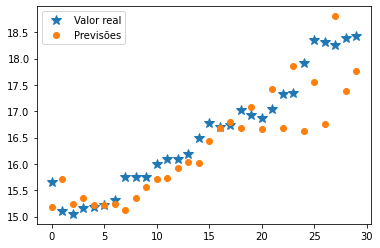

In [27]:
plt.plot(y_teste2, '*', markersize = 10, label = 'Valor real')
plt.plot(previsoes2, 'o', label = 'Previsões')
plt.legend()